In [1]:
import functools
import logging
import pprint

import PIL.Image
import graphcat.notebook
import numpy

import imagecat.notebook

logging.basicConfig(level=logging.INFO)

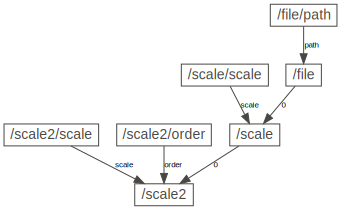

In [2]:
graph = graphcat.Graph()

graph.set_task("/file", imagecat.file)
graph.set_parameter("/file", "path", "/file/path", "../artwork/logo.png")

graph.set_task("/scale", imagecat.scale)
graph.set_parameter("/scale", "scale", "/scale/scale", (100/1024, 100/1024))

graph.set_task("/scale2", imagecat.scale)
graph.set_parameter("/scale2", "scale", "/scale2/scale", (3, 3))
graph.set_parameter("/scale2", "order", "/scale2/order", 0)

graph.set_links("/file", ("/scale", 0))
graph.set_links("/scale", ("/scale2", 0))

graphcat.notebook.display(graph)

INFO:imagecat:Task /file loaded ../artwork/logo.png RGBA 2560x1440



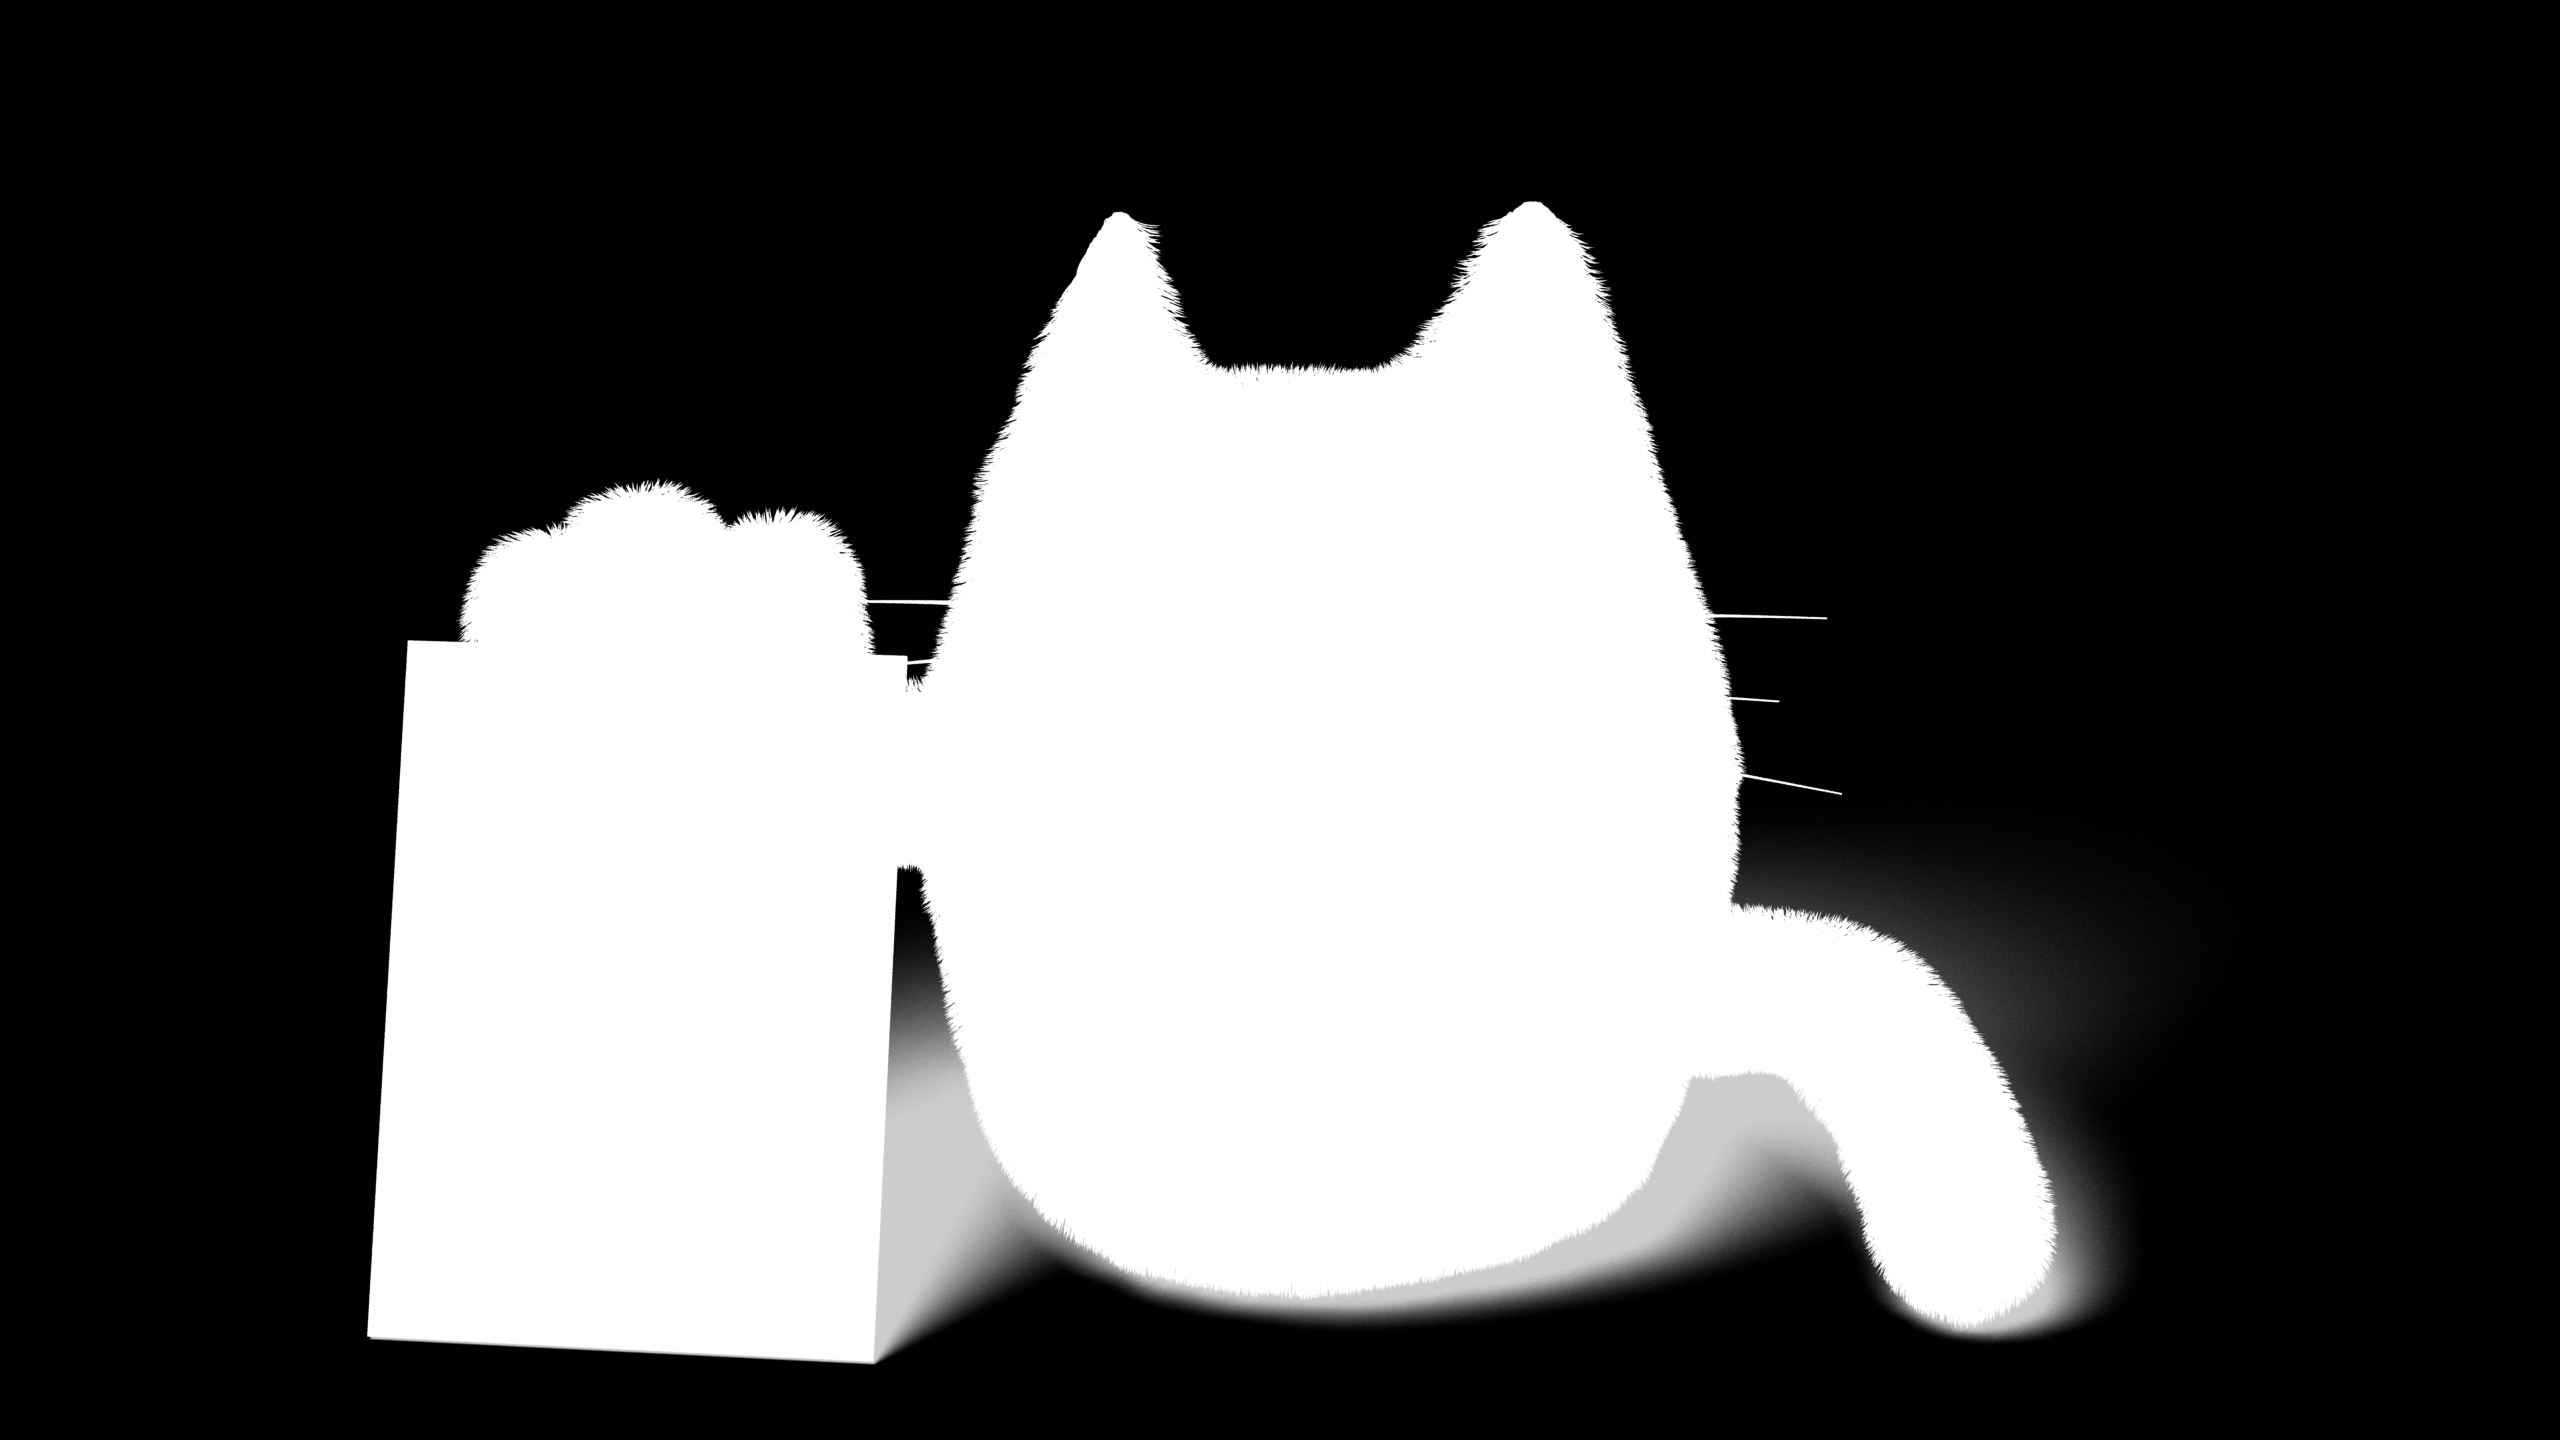
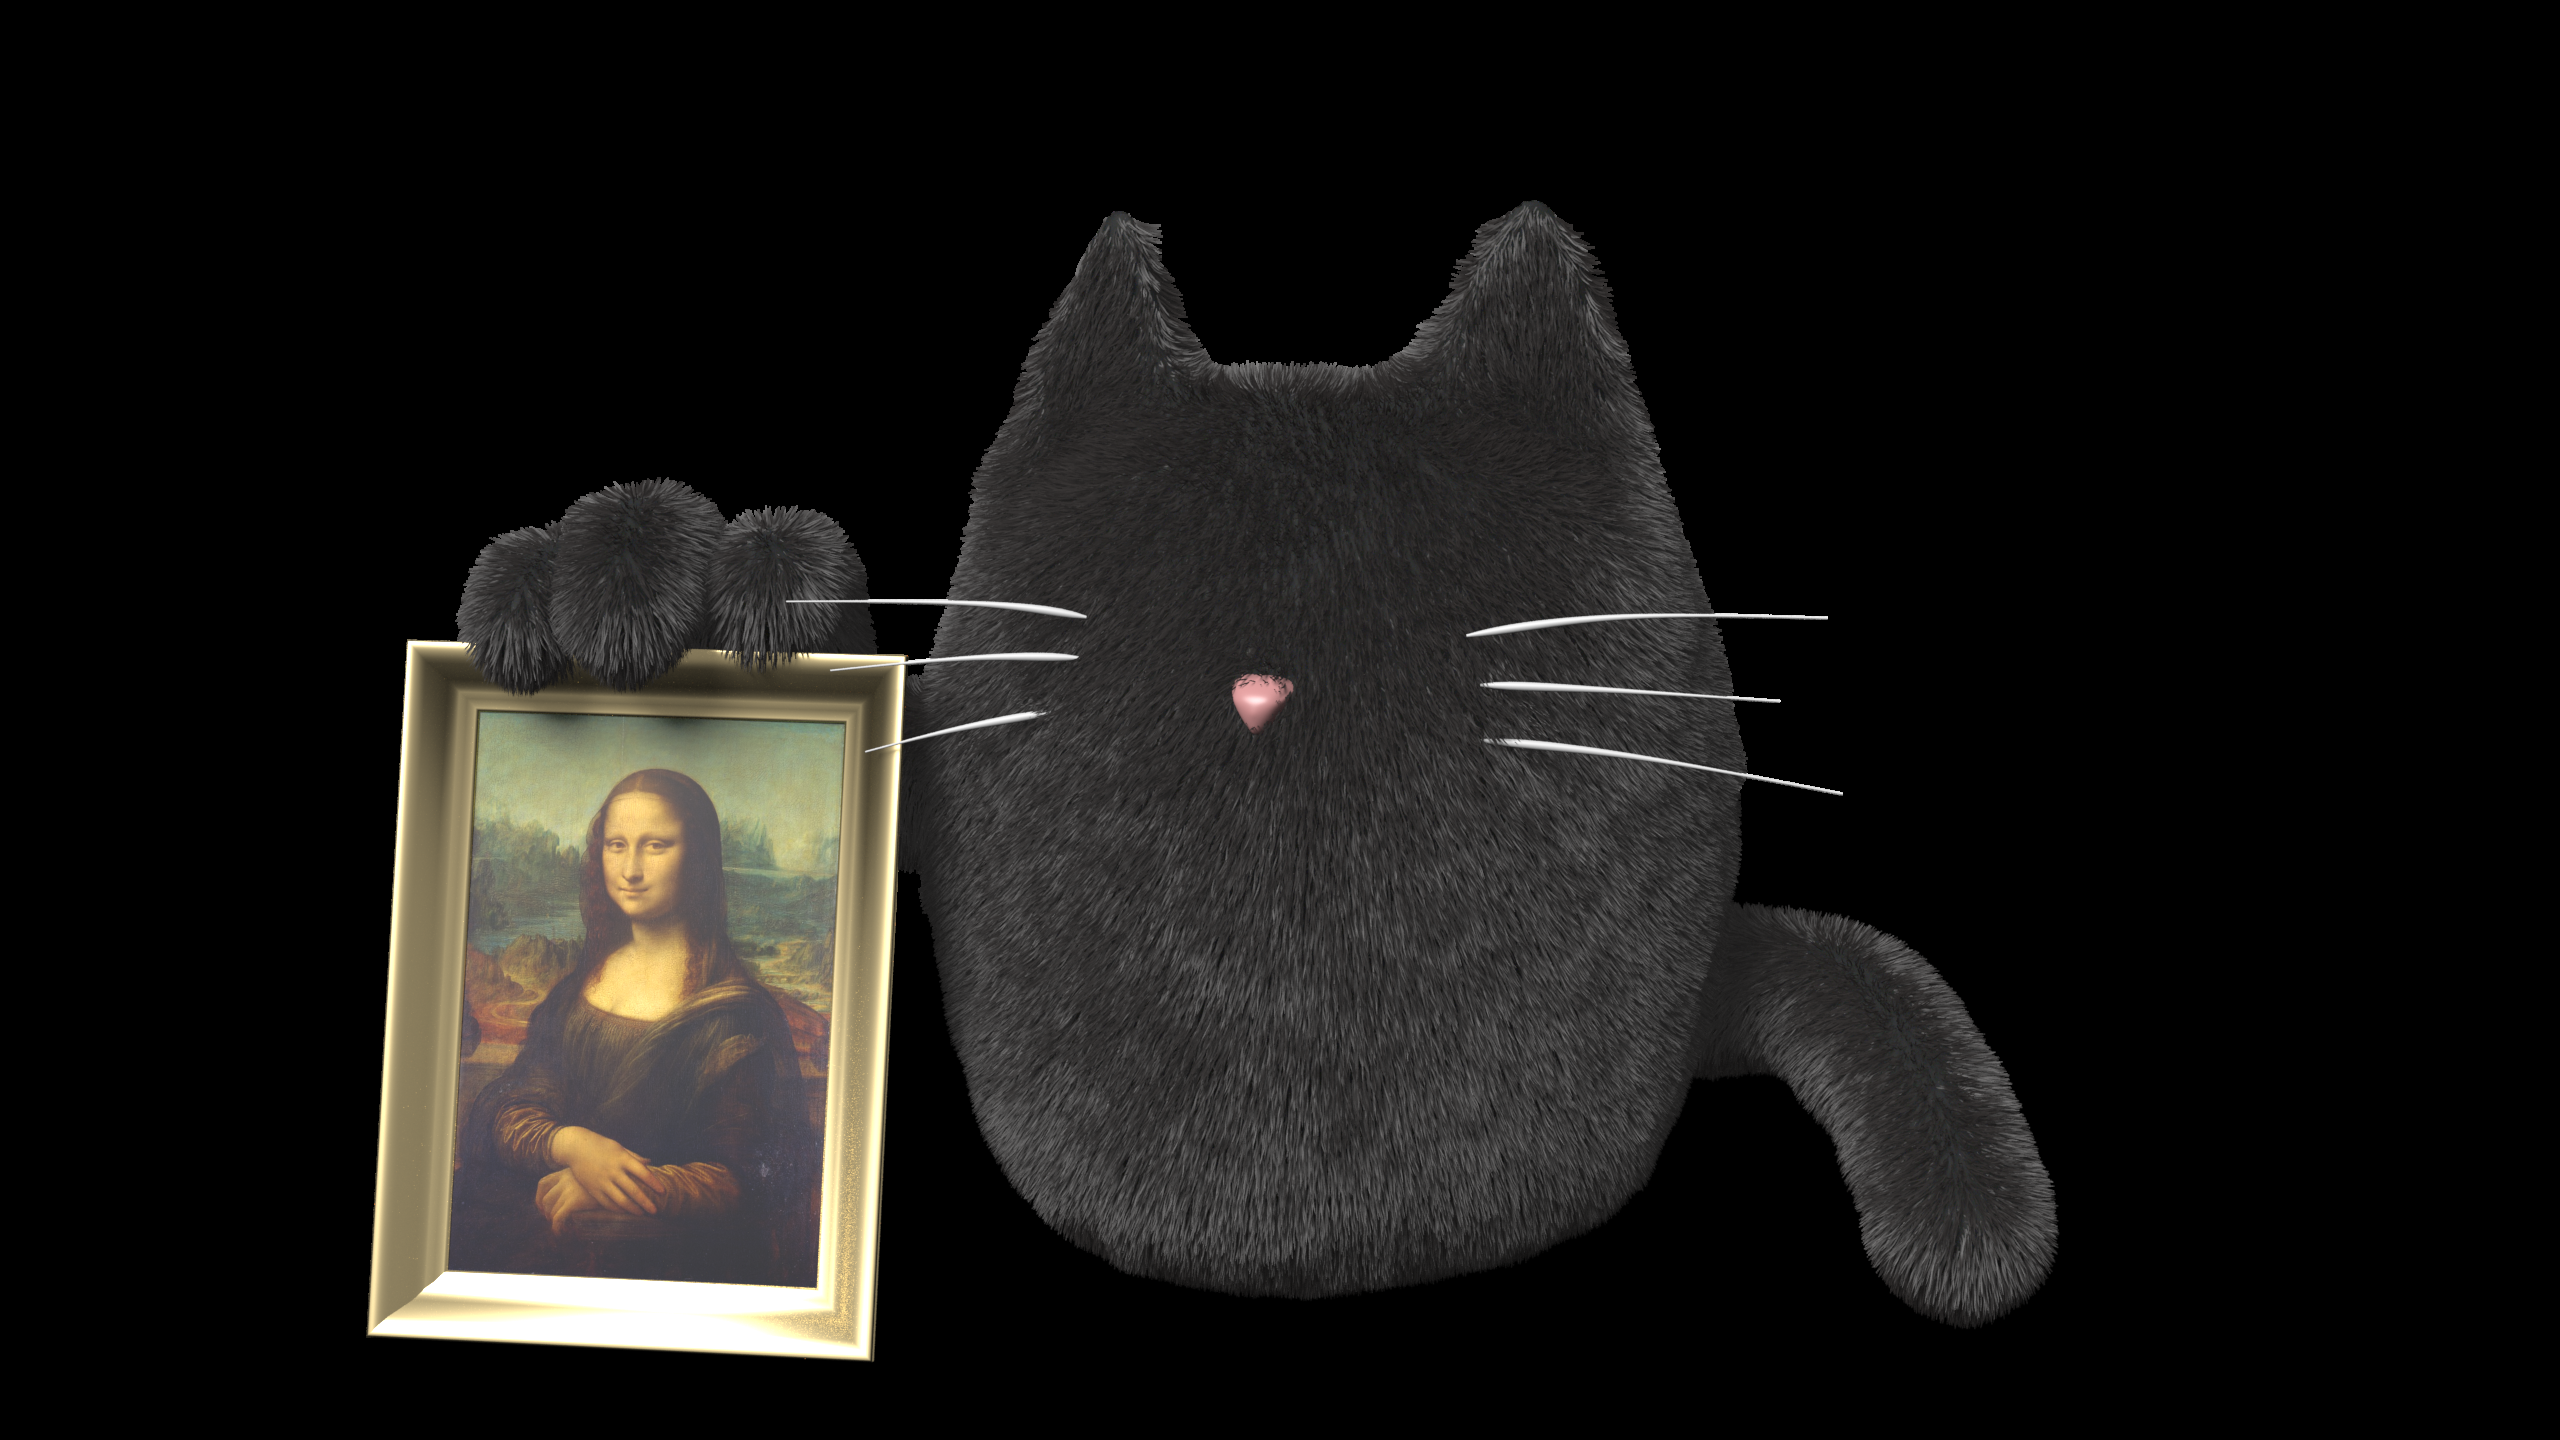

INFO:imagecat:Task /scale resizing plane C scale (0.09765625, 0.09765625) order 3
INFO:imagecat:Task /scale resizing plane A scale (0.09765625, 0.09765625) order 3



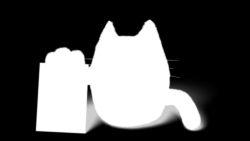
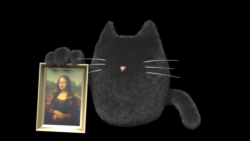

INFO:imagecat:Task /scale2 resizing plane C scale (3, 3) order 0
INFO:imagecat:Task /scale2 resizing plane A scale (3, 3) order 0



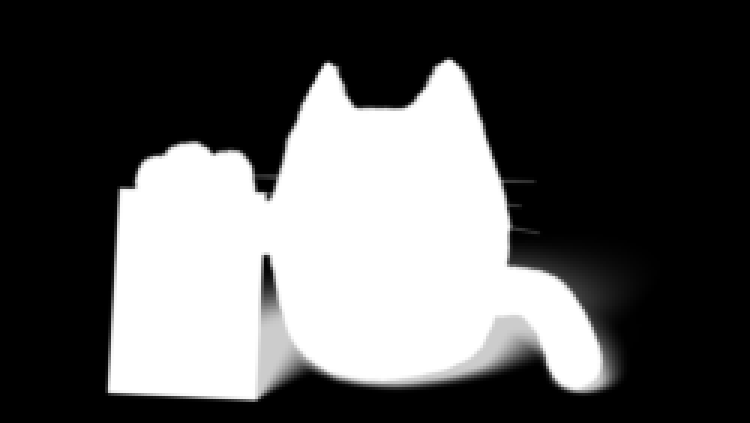
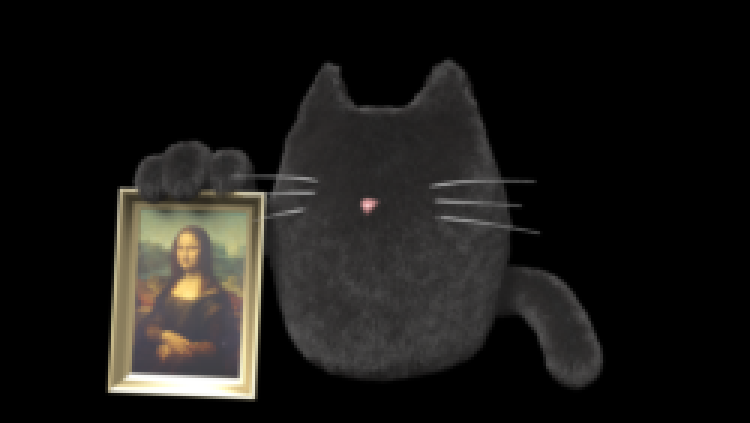

In [3]:
imagecat.notebook.display(graph.output("/file"), height="200px")
imagecat.notebook.display(graph.output("/scale"), height="100px")
imagecat.notebook.display(graph.output("/scale2"), height="200px")

INFO:imagecat:Task /constant generating constant plane C size (4096, 4096) value [1.  0.5 0.1]
INFO:imagecat:Task /constant2 generating constant plane A size (4096, 4096) value [1]
INFO:imagecat:Task /merge merging input 0 planes ['C']
INFO:imagecat:Task /merge merging input 1 planes ['A']



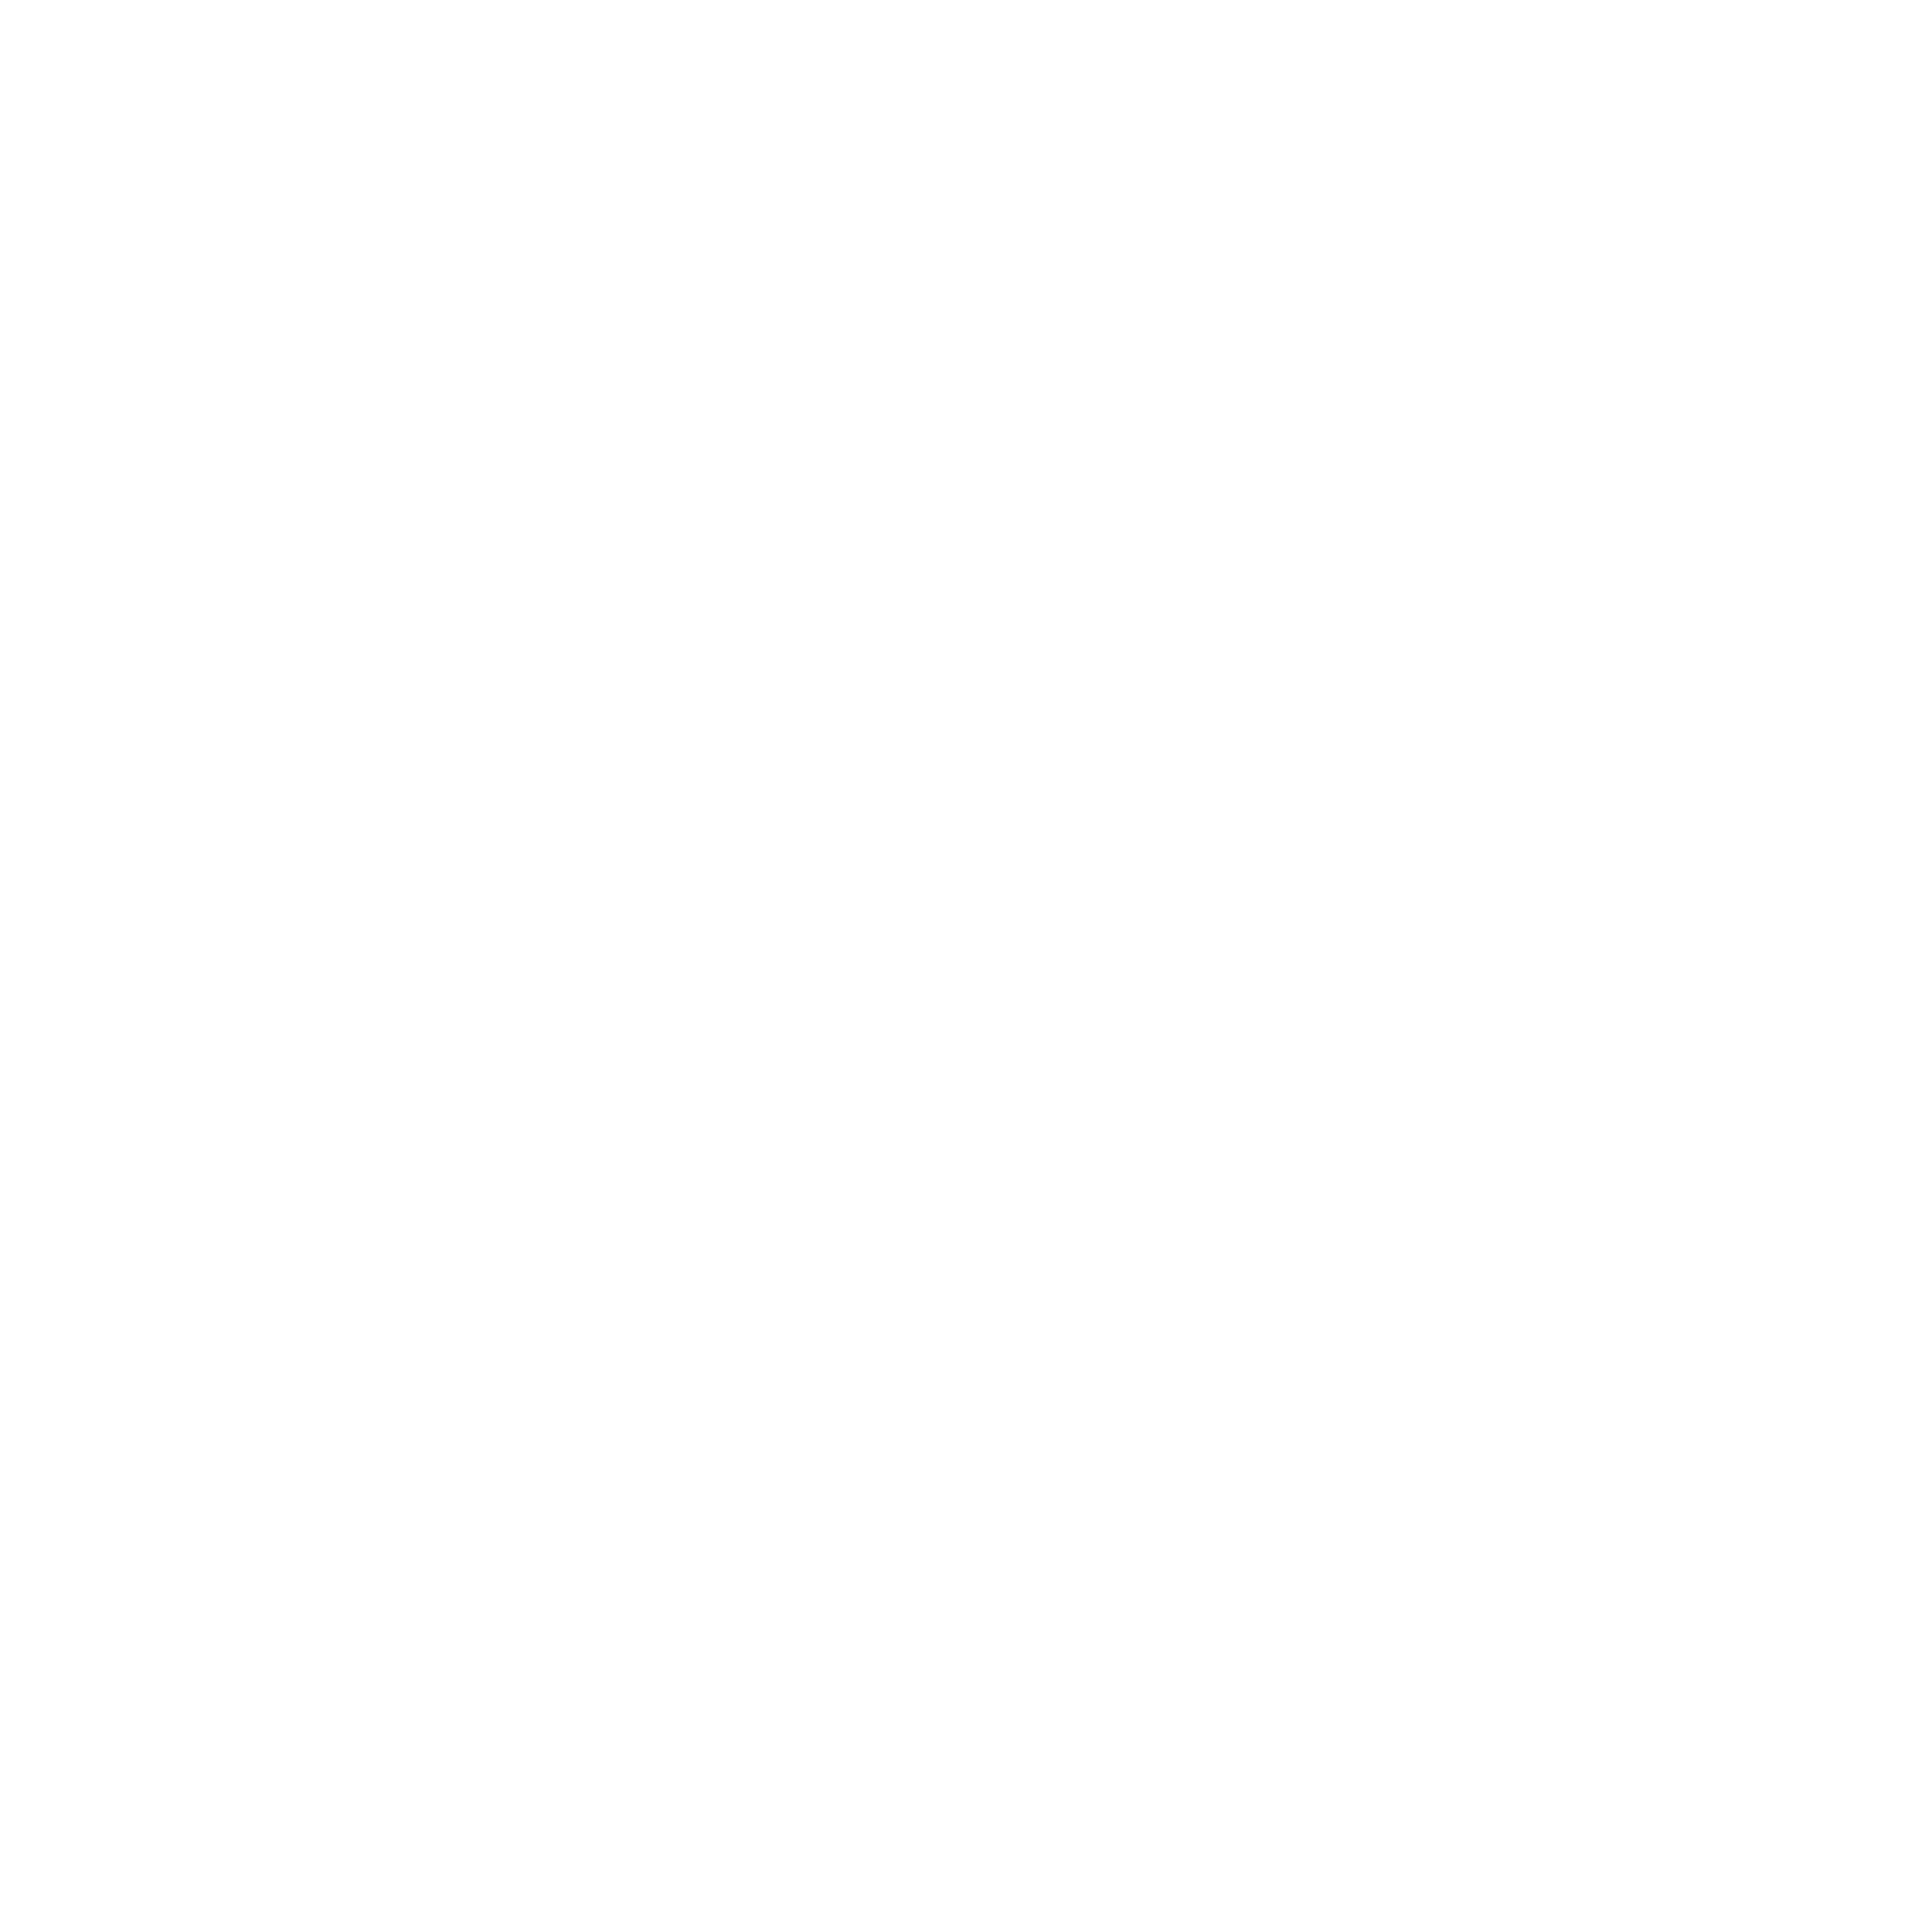
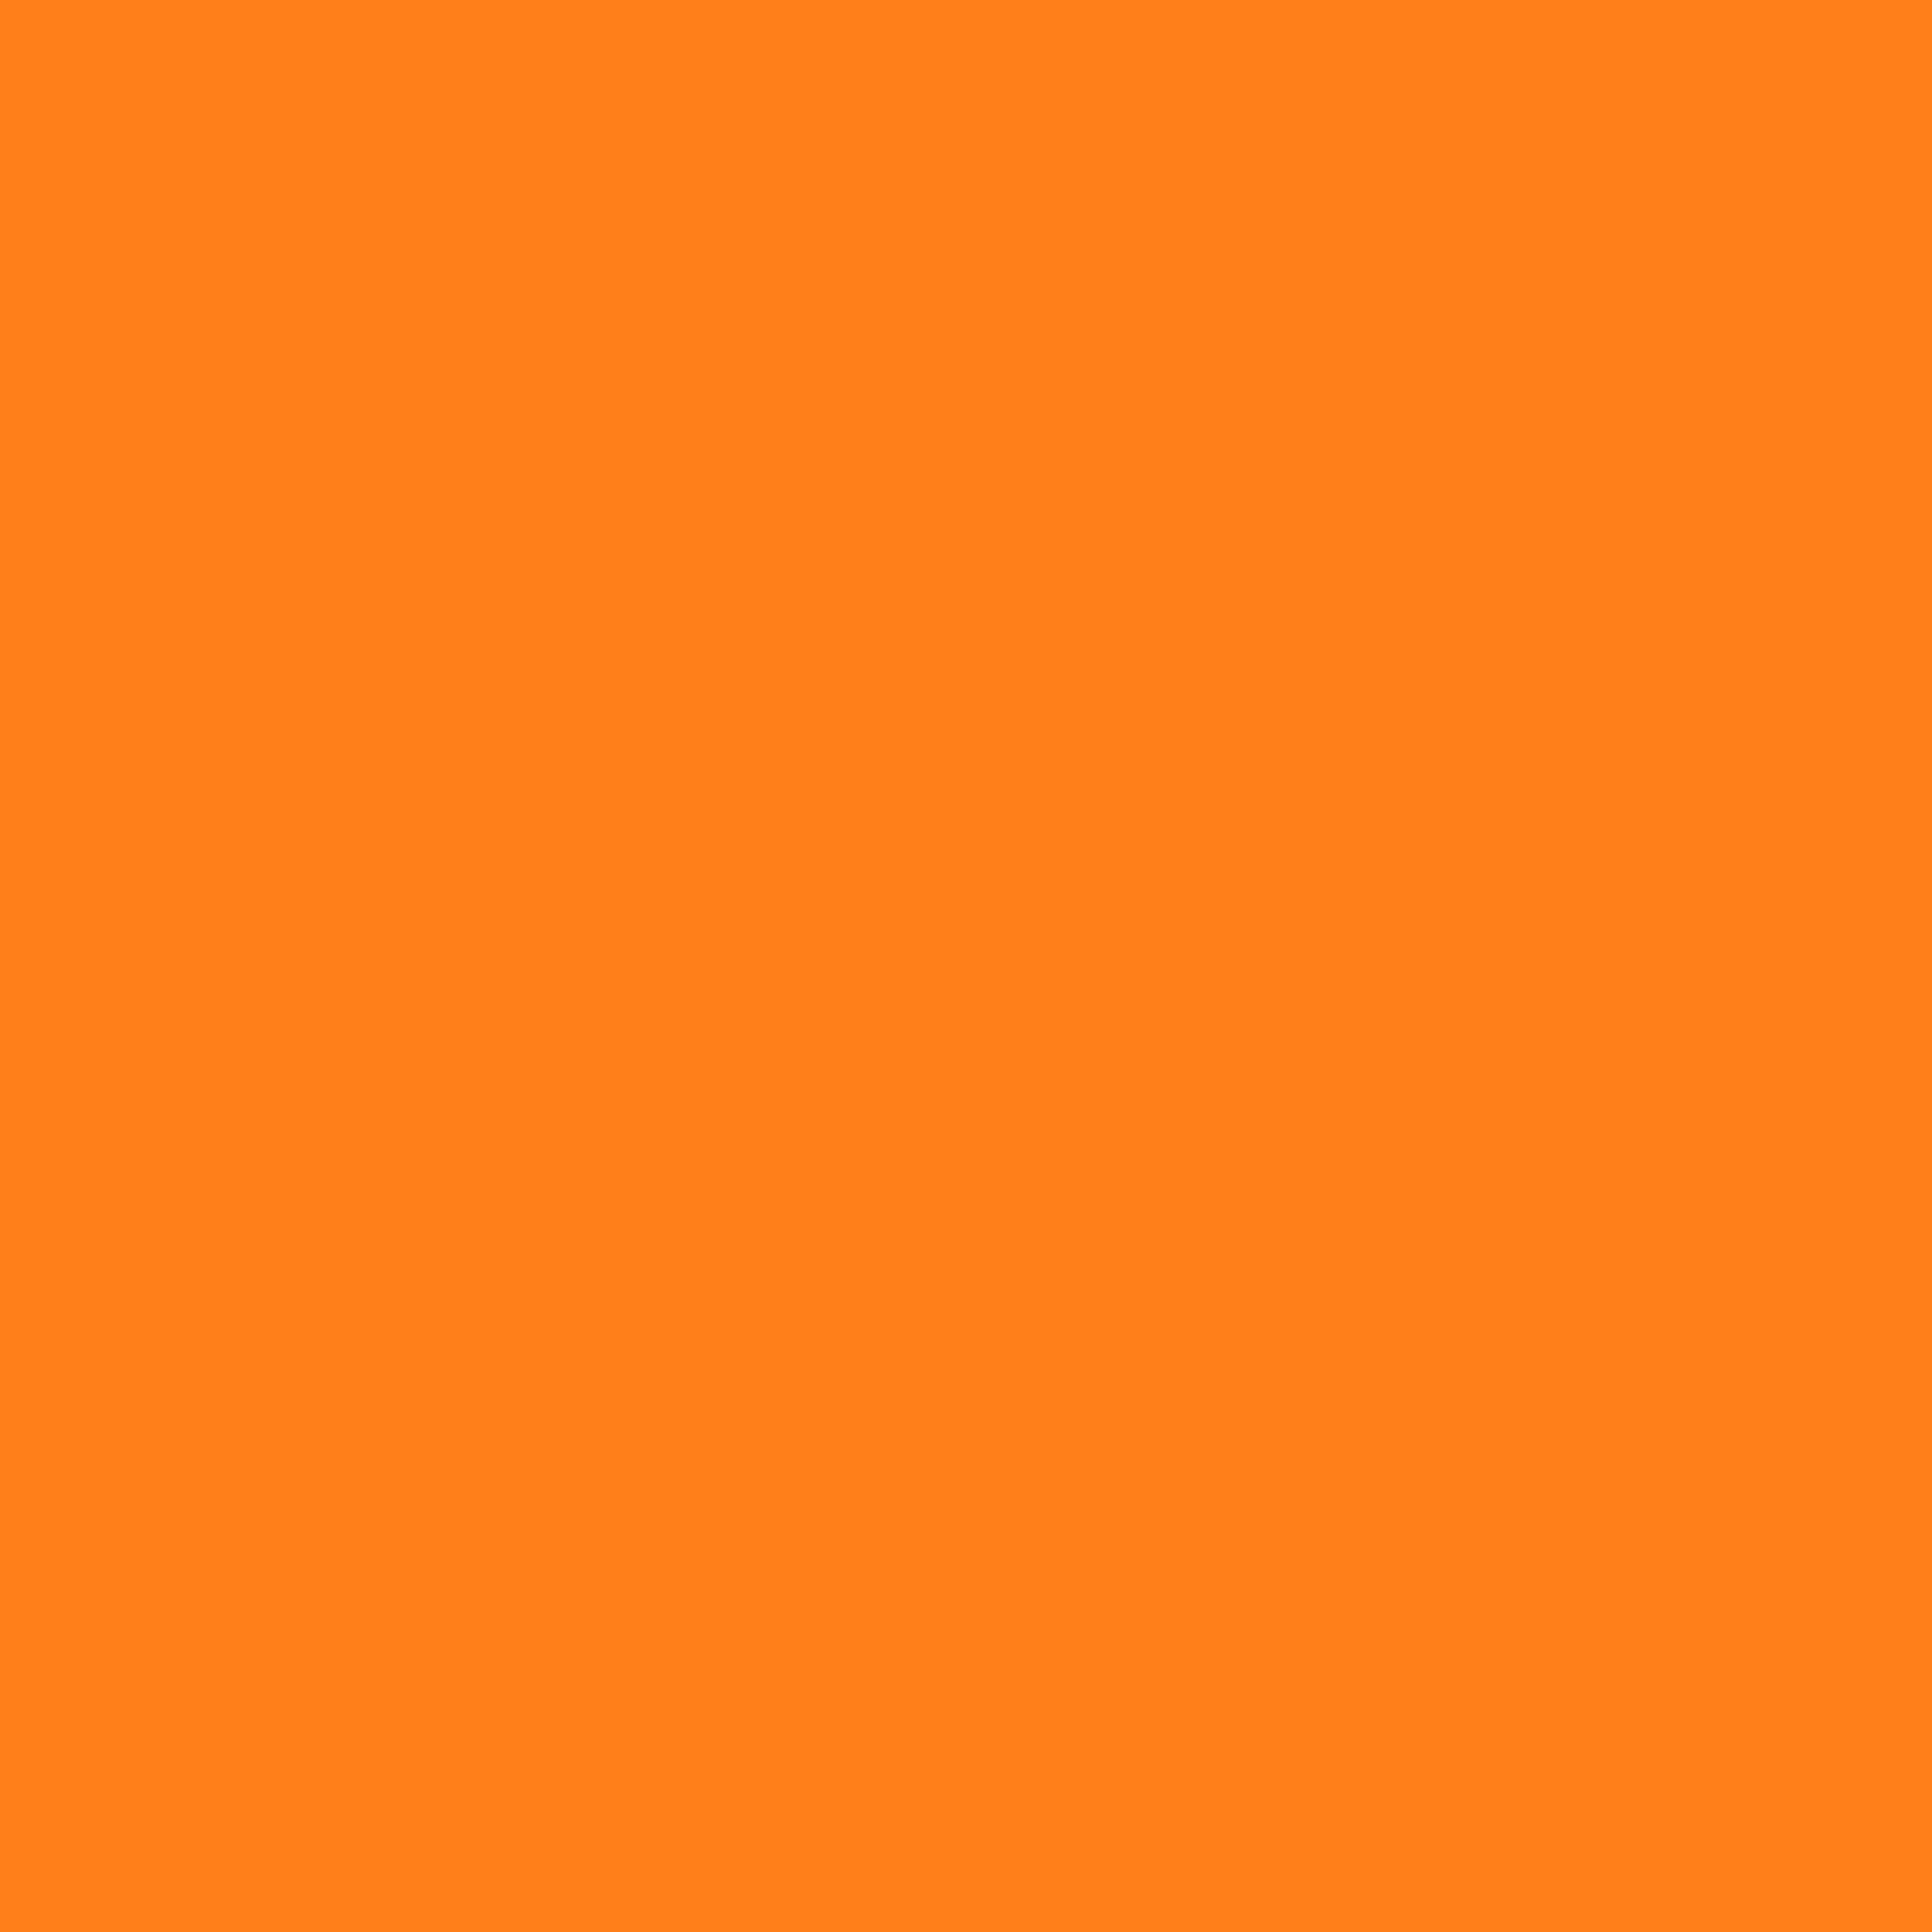

In [4]:
graph = graphcat.Graph()

graph.set_task("/constant", imagecat.constant)
graph.set_parameter("/constant", "size", "/constant/size", (4096, 4096))
graph.set_parameter("/constant", "value", "/constant/value", numpy.array([1, 0.5, 0.1]))

graph.set_task("/constant2", imagecat.constant)
graph.set_parameter("/constant2", "size", "/constant2/size", (4096, 4096))
graph.set_parameter("/constant2", "value", "/constant2/value", numpy.array([1]))
graph.set_parameter("/constant2", "plane", "/constant2/plane", "A")

graph.set_task("/merge", imagecat.merge)
graph.set_links("/constant", ("/merge", 0))
graph.set_links("/constant2", ("/merge", 1))

imagecat.notebook.display(graph.output("/merge"), height="300px")